**DESCRIPTION**

``One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.``

``Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.``

In [3]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates
from matplotlib import style
style.use('fivethirtyeight')

In [4]:
# Import and read the business file
dataframe = pd.read_csv('Walmart_Store_sales.csv', parse_dates=['Date'])

In [5]:
# Make a copy of the data
walmart = dataframe.copy()
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


##### Mapping some columns

In [7]:
# Define a function to map the Month column
def month(x):
    if x == 1:
        return 'Jan'
    elif x==2:
        return 'Feb'
    elif x==3:
        return 'Mar'
    elif x==4:
        return 'Apr'
    elif x==5:
        return 'May'
    elif x==6:
        return 'Jun'
    elif x==7:
        return 'Jul'
    elif x==8:
        return 'Aug'
    elif x==9:
        return 'Sep'
    elif x==10:
        return 'Oct'
    elif x==11:
        return 'Nov'
    else :
        return 'Dec'    

# Defining a function to add a Semester column
def semester(x):
    if x in ['Jan','Feb','Mar','Apr','May','Jun']:
        return 1
    else:
        return 2

In [8]:
# Adding a Year column to the dataframe
walmart['Year'] = walmart['Date'].dt.year 

# ------------------------------------------------------------------------------------------------------------------------

# Adding a Quarter column to the dataframe
walmart['Quarter'] = walmart['Date'].dt.quarter

# ------------------------------------------------------------------------------------------------------------------------
# Adding a Month column to the dataframe
walmart['Month'] = walmart['Date'].dt.month
# Applying the month() function to the column Month
walmart['Month'] = walmart['Month'].apply(month)

# ------------------------------------------------------------------------------------------------------------------------
# Adding a Semester column to the dataframe
# Applying the Semester function to the 'Date' column
walmart['Semester'] = walmart['Month'].apply(semester)

# ------------------------------------------------------------------------------------------------------------------------
# Adding a weekofyear column to the dataframe
walmart['Week of Year'] = walmart['Date'].dt.isocalendar().week 

# Sort by 'Date' and view first column
walmart_sorted_by_date = walmart.sort_values(by=['Date'])
walmart_sorted_by_date.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Semester,Week of Year
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,Jan,1,1
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,Jan,1,1
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,Jan,1,1
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,Jan,1,1
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,Jan,1,1


# Basic Statistics tasks

##### Checking duplicate values

In [9]:
print(f' There is {walmart.duplicated().sum()} duplicate values in the walmart dataframe')

 There is 0 duplicate values in the walmart dataframe


#####  Checking missing values

In [10]:
walmart.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Quarter         0
Month           0
Semester        0
Week of Year    0
dtype: int64

### Univariate and bivariate analysis

##### Weekly distribution of sales

In [11]:
# Copy the walmart_sorted_by_date dataframe
new_walmart = walmart_sorted_by_date.copy()

In [12]:
# Present classes in'Year' variable
new_walmart.groupby(by='Year').size()

Year
2010    2160
2011    2340
2012    1935
dtype: int64

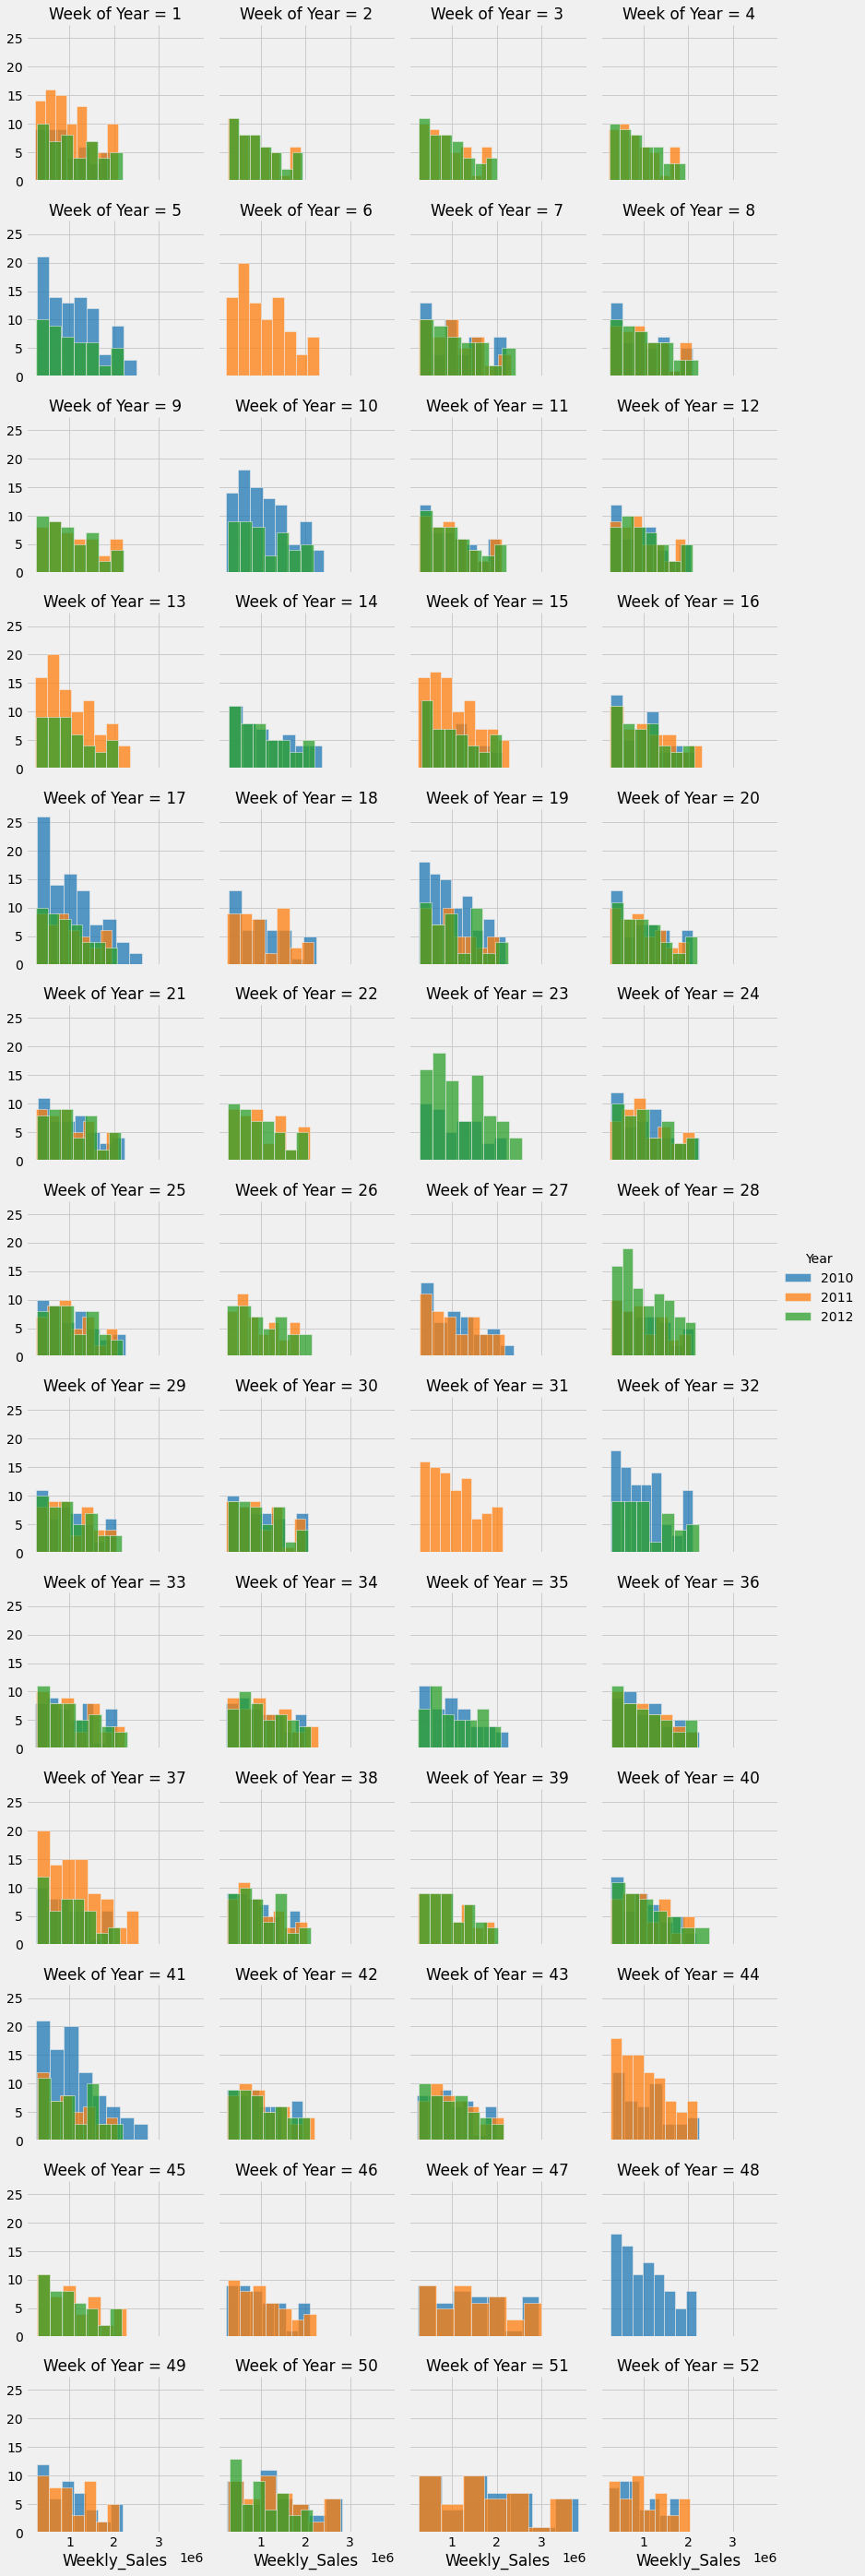

In [13]:
g = sns.FacetGrid(new_walmart,col_wrap=4, col='Week of Year', hue='Year', palette='tab10')
g.map(sns.histplot,'Weekly_Sales')
g.add_legend()

``The weekly sales are not normally distributed as we can observe above with an apparent positive skewness. The values are shown in the next cell. ``

In [11]:
print('Skewness of weekly sales in 2010')
print(new_walmart.groupby(by=['Year','Week of Year'])[['Weekly_Sales']].skew().loc[2010])
print('Skewness of weekly sales in 2011')
print(new_walmart.groupby(by=['Year','Week of Year'])[['Weekly_Sales']].skew().loc[2011])
print('Skewness of weekly sales in 2012')
print(new_walmart.groupby(by=['Year','Week of Year'])[['Weekly_Sales']].skew().loc[2012])

Skewness of weekly sales in 2010
              Weekly_Sales
Week of Year              
1                 0.515714
5                 0.487752
7                 0.493953
8                 0.569876
10                0.462975
11                0.510129
12                0.475886
14                0.396023
15                0.474708
16                0.435269
17                0.646370
18                0.509113
19                0.502637
20                0.440670
21                0.369142
23                0.354944
24                0.445155
25                0.450469
27                0.481356
28                0.433597
29                0.419897
30                0.420053
32                0.462570
33                0.389787
34                0.337599
35                0.460193
36                0.414628
37                0.523548
38                0.505791
40                0.467339
41                0.682378
42                0.499556
43                0.474967
44                0.43

##### View the Weekly_Sales per year and per day type (holiday or non-holiday)

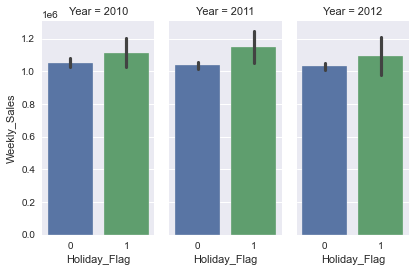

In [560]:
# Plot the weekly sales per year and per day type
plt.style.use('seaborn')
g = sns.FacetGrid(new_walmart, col='Year', height=4, aspect=.5, hue='Holiday_Flag')
g.map(sns.barplot, 'Holiday_Flag', 'Weekly_Sales', order=[0,1])

``We can observe that Walmart makes more money during holidays``

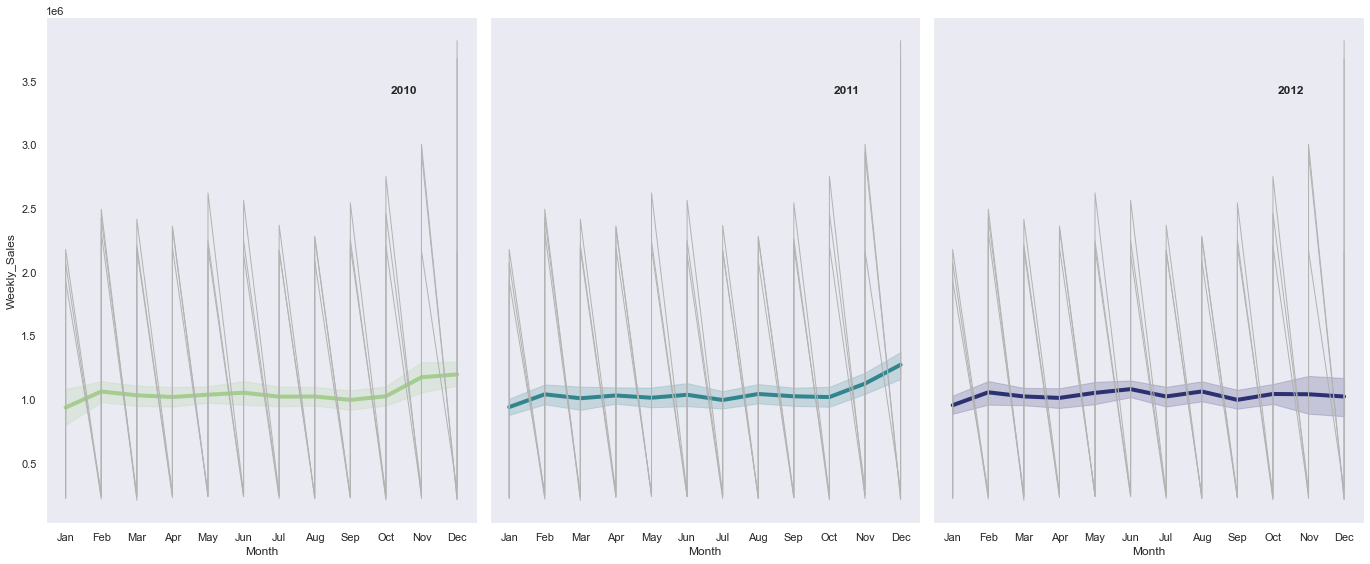

In [12]:
sns.set_theme(style='dark')
plt.style.use('tableau-colorblind10')

# Plot each year time series in its own facet
g = sns.relplot(data= new_walmart, x= 'Month', y='Weekly_Sales', col='Year', hue='Year', kind='line', palette='crest', 
                linewidth=4,zorder=0, height=8, aspect=.8, legend=False)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight='bold')
    # Plot every year's time series in the background
    sns.lineplot(data = new_walmart, x= 'Month', y= 'Weekly_Sales', units='Year', estimator=None, color='.7', linewidth=1, 
                 ax=ax)

# Tweak the supporting aspects of the plot
g.set_titles('')
g.set_axis_labels('Month','Weekly_Sales')
g.tight_layout()

``Over the 3 years, the weekly sales are almost in the same range. The data show a similar pattern except in the last quarter of 2012 where we can observe a drop of sales.``

##### Which store has maximum sales

In [561]:
# Fetching the maximum standard deviation in the dataset
max_sales = new_walmart.groupby('Store').sum()
max_sales = max_sales[max_sales['Weekly_Sales'] == max(max_sales['Weekly_Sales'])][['Weekly_Sales']]
# Reset the index in the created dataset
max_sales.reset_index(level=0, inplace=True)
# Pulling out the searched Store
print(f' The Store {max_sales.iat[0,0]} has the maximum sales')

 The Store 20 has the maximum sales


##### Which store has maximum standard deviation i.e., the sales vary a lot. 

In [13]:
# Group by 'Store' column
store_high_var_sales = new_walmart.groupby('Store').std()
store_high_var_sales = store_high_var_sales[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]

# Calculate the std in the walmart dataframe by Store
store_high_var_sales = walmart.groupby('Store').std()

# Fetching the maximum standard deviation in the dataset
max_std = (store_high_var_sales[store_high_var_sales['Weekly_Sales'] == 
                                max(store_high_var_sales['Weekly_Sales'])][['Weekly_Sales']])

# Reset the index in the created dataset
max_std.reset_index(level=0, inplace=True)

# Pulling out the searched Store
print(f' The Store {max_std.iat[0,0]} has the maximum standard deviation')

 The Store 14 has the maximum standard deviation


##### Find out the coefficient of mean to standard deviation

In [14]:
# SLice the dataframe with relevant features
walmart_cv = new_walmart[['Store','Year','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]

# Define a lambda function to calculate the standard deviation
cv = lambda x: np.std(x,ddof=1)/np.mean(x)

# Group the dataframe by 'Year' and 'Store' and apply the cv function : coefficient of mean to standard deviation
mean_to_std = walmart_cv.groupby(by=['Year','Store'])[['Weekly_Sales','Temperature','Fuel_Price',
                                                       'CPI','Unemployment']].apply(cv)

In [15]:
# Maximum coefficients in 2010
mean_to_std.sort_values(by='Weekly_Sales',ascending=False).loc[2010].head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
29,0.219718,0.293299,0.043250,0.003184,0.017558
7,0.219589,0.372190,0.022208,0.003357,0.007581
15,0.217778,0.326316,0.041484,0.003184,0.012198
23,0.210169,0.351568,0.043250,0.003184,0.039156
35,0.204052,0.289710,0.042727,0.003162,0.019985


In [16]:
# Maximum coefficients in 2011
mean_to_std.sort_values(by='Weekly_Sales',ascending=False).loc[2011].head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
35,0.213848,0.299409,0.066670,0.009313,0.011145
7,0.208419,0.490729,0.070286,0.007727,0.012754
15,0.197765,0.357891,0.061798,0.009350,0.009850
23,0.196995,0.399502,0.069393,0.009350,0.054270
18,0.192922,0.345842,0.069393,0.009350,0.027517


In [17]:
# Maximum coefficients in 2012
mean_to_std.sort_values(by='Weekly_Sales',ascending=False).loc[2012].head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
7,0.139028,0.342671,0.079028,0.003330,0.026706
28,0.119727,0.214807,0.058545,0.002129,0.056041
14,0.110368,0.243456,0.048221,0.004270,0.012525
23,0.104827,0.327201,0.045957,0.004195,0.013657
35,0.102338,0.245552,0.048221,0.004258,0.007979


##### Which store/s has good quarterly growth rate in Q3’2012

In [21]:
# Grouping the dataframe by Year and by store with sum()
#df_year_quarter_store = walmart.groupby(['Year','Quarter','Store']).sum() 

# Look up the dataframe in Q3-2012
walmart_Q3_2012 = new_walmart[(new_walmart['Year']==2012) & (walmart['Quarter'] == 3)]


# Look up the dataframe in 2012
walmart_Q2_2012 = new_walmart[(new_walmart['Year']==2012) & (new_walmart['Quarter'] == 2)]

# Redefine the tables by selecting the necessary columns
walmart_Q2_2012 = walmart_Q2_2012[['Store','Weekly_Sales']]
walmart_Q3_2012 = walmart_Q3_2012[['Store','Weekly_Sales']]

# Reset the index of new tables
walmart_Q2_2012.reset_index(inplace=True, drop=True)
walmart_Q3_2012.reset_index(inplace=True, drop= True)

# Rename the columns
walmart_Q2_2012.rename(columns={'Weekly_Sales':'Weekly_Sales_Q2'}, inplace=True)
walmart_Q3_2012.rename(columns={'Weekly_Sales':'Weekly_Sales_Q3'}, inplace=True)

# Group both tables by Store
walmart_Q2_2012_grouped = walmart_Q2_2012.groupby(by='Store').sum()
walmart_Q3_2012_grouped = walmart_Q3_2012.groupby(by= 'Store').sum()

# Concatenate walmart_Q2_2012_grouped and walmart_Q3_2012_grouped
walmart_Q2_Q3_2012 = pd.concat([walmart_Q2_2012_grouped, walmart_Q3_2012_grouped], axis=1)

# Add a Growth Rate column
walmart_Q2_Q3_2012["Growth_Rate_Q3'2012"] = (walmart_Q2_Q3_2012['Weekly_Sales_Q3'] - 
                                             walmart_Q2_Q3_2012['Weekly_Sales_Q2'])/walmart_Q2_Q3_2012['Weekly_Sales_Q3']

# Sort by "Growth_Rate_Q3'2012"
walmart_Q2_Q3_2012_sorted_by_growth_rate = walmart_Q2_Q3_2012.sort_values(by=["Growth_Rate_Q3'2012"], 
                                                                          ascending=False)

# Reset index in walmart_Q2_Q3_2012_sorted_by_growth_rate
walmart_Q2_Q3_2012_sorted_by_growth_rate.reset_index(level=0, inplace=True)

print(f" The store {walmart_Q2_Q3_2012_sorted_by_growth_rate.iat[0,0]} with {walmart_Q2_Q3_2012_sorted_by_growth_rate.iat[0,3]:.3f} has the best quarterly growth rate in Q3’2012")

 The store 16 with -0.029 has the best quarterly growth rate in Q3’2012


##### Some holidays have a negative impact on sales. 
##### Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

``Holiday Events``

``Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13``

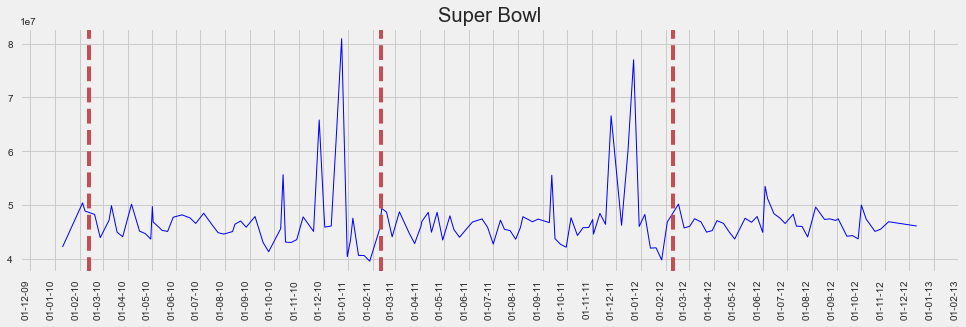

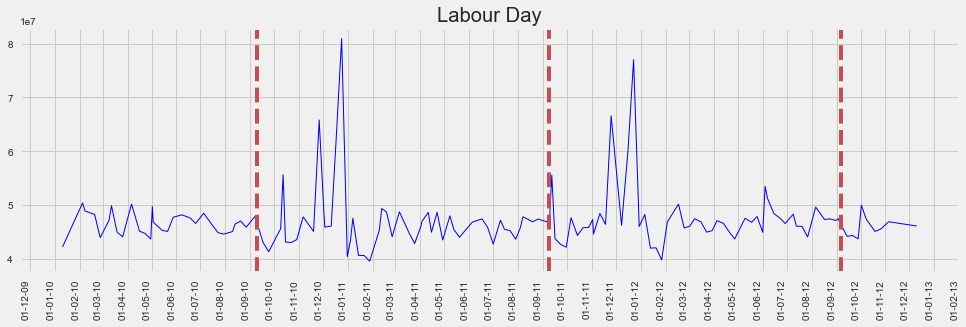

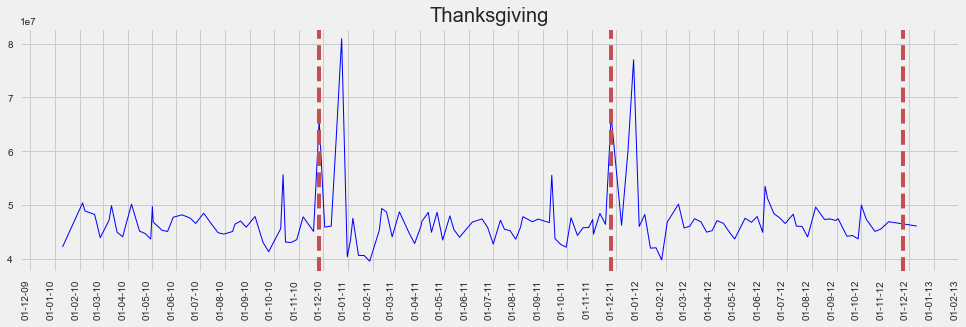

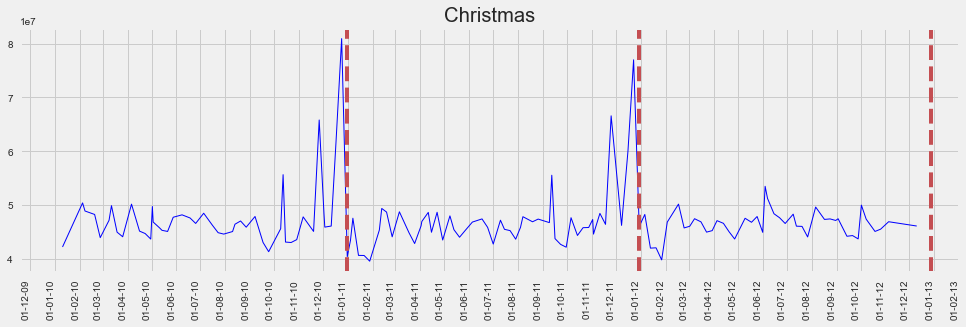

In [602]:
# Define a function to plot the weekly sales relatively to holidays date

def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label, linewidth=1, c= 'blue')
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = new_walmart.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

# Plot the sales vs holidays
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

``We can see above that the sales increase right before and during Thanksgiving holidays and decrease after Christmas``

In [24]:
# Slice the 'walmart' dataframe to fetch all holidays
walmart_holidays = new_walmart[new_walmart['Holiday_Flag']==1]

# Slice the walmart dataframe for non-holidays 
walmart_no_holidays = new_walmart[new_walmart['Holiday_Flag']==0]

# Convert the 'Date' column to Timestamp type in the walmart_holidays
long = len(walmart_holidays['Date'])
r = range(long)

walmart_holidays['Events'] = [pd.Timestamp(str(walmart_holidays.iat[i,1])) for i in r]

In [25]:
# Create a function to map the Events column in the walmart_holidays dataframe
def holidays(x):
    if x == pd.Timestamp('2010-02-12 00:00:00') or x == pd.Timestamp('2011-02-11 00:00:00') or x == pd.Timestamp('2012-02-10 00:00:00') or x== pd.Timestamp('2013-02-08 00:00:00'):
        return 'Super Bowl'
        
    elif x == pd.Timestamp('2010-09-10 00:00:00') or x == pd.Timestamp('2011-09-09 00:00:00') or x == pd.Timestamp('2012-09-07 00:00:00') or x == pd.Timestamp('2013-09-06 00:00:00'):
        return 'Labour Day'
        
    elif x == pd.Timestamp('2010-11-26 00:00:00') or x == pd.Timestamp('2011-11-25 00:00:00') or x == pd.Timestamp('2012-11-23 00:00:00') or x == pd.Timestamp('2013-11-29 00:00:00'):
        return 'Thanksgiving'
        
    elif x == pd.Timestamp('2010-12-31 00:00:00') or x == pd.Timestamp('2011-12-30 00:00:00') or x == pd.Timestamp('2012-12-28 00:00:00') or x == pd.Timestamp('2013-12-27 00:00:00'):
        return 'Christmas'
        
    else:
        return 'Other Event'
        

# Apply the holidays function to the 'Date' column in the walmart_holidays dataframe and view the first rows
walmart_holidays['Events'] = walmart_holidays['Events'].apply(holidays)

# View main classes of Events in dataframe
walmart_holidays['Events'].value_counts()

Other Event     225
Thanksgiving     90
Christmas        90
Labour Day       45
Name: Events, dtype: int64

In [26]:
# Calculate the mean of sales for walmart_no_holidays dataframe
no_holidays_mean = walmart_no_holidays['Weekly_Sales'].mean()

# Find out now holidays which have sales greater than no_holidays_mean
holidays_with_higher_sales_than_non_holidays_mean = walmart_holidays[(walmart_holidays['Weekly_Sales']>no_holidays_mean)]

# Count the main classes
holidays_with_higher_sales_than_non_holidays_mean['Events'].value_counts()

Other Event     104
Thanksgiving     61
Christmas        35
Labour Day       20
Name: Events, dtype: int64

##### Provide a semester view of sales in units and give insights

In [27]:
# Copy the dataframe
walmart_ = new_walmart.copy()

# Convert 'Store' column to string
walmart_['Store'] = walmart_['Store'].apply(lambda x : str(x))

# Convert 'Week of Year' column to string
#walmart_['Week of Year'] = walmart_['Week of Year'].apply(lambda x : str(x))

# Convert 'Quarter' column to string
#walmart_['Quarter'] = walmart_['Quarter'].apply(lambda x : str(x))

# Convert 'Holiday_Flag' column to string
#walmart_['Holiday_Flag'] = walmart_['Holiday_Flag'].apply(lambda x : str(x))

# Group the dataframe by 'Year' and 'Semester' and aggregate with sum function
walmart_by_semester = walmart_.groupby(by=['Year','Semester']).sum()

# Slice the dataframe on 'Weekly_Sales' column
walmart_by_semester_ = walmart_by_semester[['Weekly_Sales']]

# Reset the index and get the data
walmart_by_semester_ = walmart_by_semester_.reset_index()

# Rename the indices
walmart_by_semester_ = walmart_by_semester_.rename(index={0:'S1-2010', 1: 'S2-2010', 2: 'S1-2011', 3: 'S2-2011', 
                                                          4: 'S1-2012', 5: 'S2-2012'})

# Get the dataframe
walmart_by_semester_

,Year,Semester,Weekly_Sales
S1-2010,2010,1,1.026913e+09
S2-2010,2010,2,1.261973e+09
S1-2011,2011,1,1.138060e+09
S2-2011,2011,2,1.310140e+09
S1-2012,2012,1,1.163004e+09
S2-2012,2012,2,8.371288e+08


In [28]:
walmart_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 606 to 283
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Quarter       6435 non-null   int64         
 10  Month         6435 non-null   object        
 11  Semester      6435 non-null   int64         
 12  Week of Year  6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 943.0+ KB


In [29]:
walmart_.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Semester,Week of Year
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,Jan,1,1
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,Jan,1,1
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,Jan,1,1
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,Jan,1,1
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,Jan,1,1


Text(0, 0.5, 'Weekly Sales')

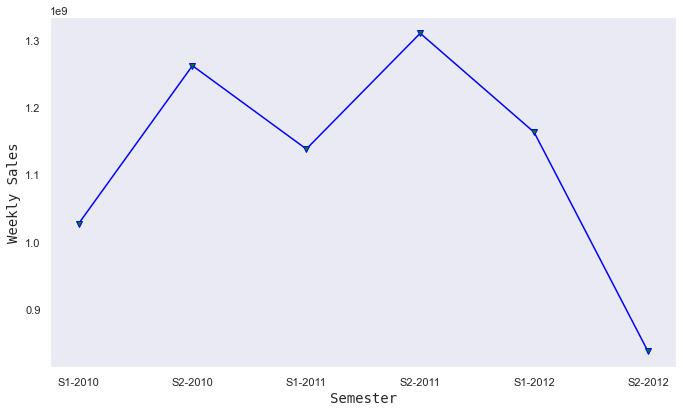

In [30]:
# Plot the sales in units by semester
plt.figure(figsize = (10,6)) # Width x Height
plt.plot(walmart_by_semester_['Weekly_Sales'], color = 'blue', marker= 'v', markerfacecolor='Green')
plt.xlabel('Semester', fontsize=14, fontfamily='monospace')
plt.ylabel('Weekly Sales', fontsize=14, fontfamily='monospace')

##### Provide a monthly view of sales in units and give insights

In [31]:
# Define a function to convert back 'Month' column
def inv_month(x):
    if x == 'Jan':
        return 1
    elif x=='Feb':
        return 2
    elif x=='Mar':
        return 3
    elif x=='Apr':
        return 4
    elif x=='May':
        return 5
    elif x=='Jun':
        return 6
    elif x=='Jul':
        return 7
    elif x=='Aug':
        return 8
    elif x=='Sep':
        return 9
    elif x=='Oct':
        return 10
    elif x=='Nov':
        return 11
    else :
        return 12


In [32]:
# Copy the dataframe
walmart_2 = new_walmart.copy()

# Convert 'Month' column to continuous variable
walmart_2['Month'] = walmart_2['Month'].apply(inv_month)

# Convert 'Store' column to string
walmart_2['Store'] = walmart_2['Store'].apply(lambda x : str(x))

# Convert 'Week of Year' column to string
walmart_2['Week of Year'] = walmart_2['Week of Year'].apply(lambda x : str(x))

# Convert 'Quarter' column to string
walmart_2['Quarter'] = walmart_2['Quarter'].apply(lambda x : str(x))

# Convert 'Holiday_Flag' column to string
walmart_2['Holiday_Flag'] = walmart_2['Holiday_Flag'].apply(lambda x : str(x))

# Convert 'Semester' column to string
walmart_2['Semester'] = walmart_2['Semester'].apply(lambda x : str(x))

# Group the dataframe by 'Year' and 'Month' and aggregate with sum function
walmart_by_month = walmart_2.groupby(by=['Year','Month']).sum()

# Slice the dataframe on 'Weekly_Sales' column
walmart_by_month_ = walmart_by_month[['Weekly_Sales']]

# Reset the index and get the data
walmart_by_month_ = walmart_by_month_.reset_index()

# Rename the indices
walmart_by_month_ = walmart_by_month_.rename(index={0:'jan2010', 1: 'feb2010', 2: 'mar2010', 3: 'apr2010',4: 'may2010',5: 'jun2010',6: 'jul2010',7: 'aug2010',8: 'sep2010',9: 'oct2010',10: 'nov2010',11: 'dec2010',12:'jan2011', 13: 'feb2011', 14: 'mar2011', 15: 'apr2011',16: 'may2011',17: 'jun2011',18: 'jul2011',19: 'aug2011',20: 'sep2011',21: 'oct2011',22: 'nov2011',23: 'dec2011',24:'jan2012', 25: 'feb2012', 26: 'mar2012', 27: 'apr2012',28: 'may2012',29: 'jun2012',30: 'jul2012',31: 'aug2012',32: 'sep2012',33: 'oct2012',34: 'nov2012',35: 'dec2012'})

# Get the dataframe
walmart_by_month_

,Year,Month,Weekly_Sales
jan2010,2010,1,4.223988e+07
feb2010,2010,2,1.915869e+08
mar2010,2010,3,1.862262e+08
apr2010,2010,4,1.838118e+08
may2010,2010,5,2.806119e+08
jun2010,2010,6,1.424361e+08
jul2010,2010,7,1.842664e+08
aug2010,2010,8,1.845381e+08
sep2010,2010,9,1.797041e+08
oct2010,2010,10,2.311201e+08


Text(0.5, 1.0, 'Sales in units by month')

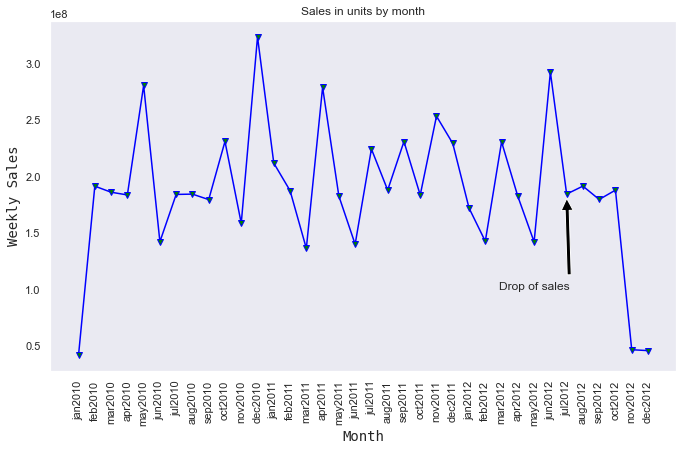

In [33]:
# Plot the sales in units by month
plt.figure(figsize = (10,6)) # Width x Height
plt.plot(walmart_by_month_['Weekly_Sales'], color = 'blue', marker= 'v', markerfacecolor='Green')
plt.xlabel('Month', fontsize=14, fontfamily='monospace')
plt.xticks(rotation='vertical')
plt.ylabel('Weekly Sales', fontsize=14, fontfamily='monospace')
plt.annotate('Drop of sales', xy=(30,1.845865e+08), xytext= (28,1e+08), arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='baseline')
plt.title('Sales in units by month')

# Plot a trend line
#x=np.array(list(walmart_by_month_.index))
#y=np.array(list(walmart_by_month_['Weekly_Sales']))
#plt.plot(np.polyfit(x, y,1))

``A drop of sales are observed since July 2012 and this continues to December 2012``

### Multi-variate analysis

##### Distribution of sales per semester per year

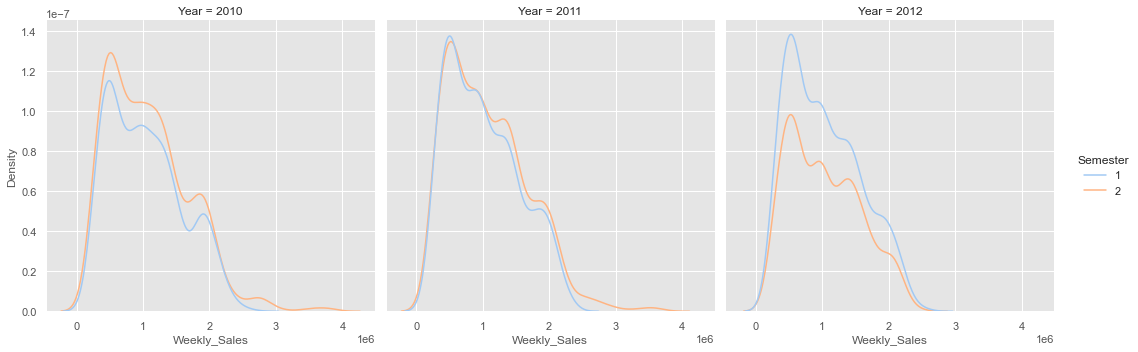

In [34]:
# Copy the dataframe
walmart_month_semester = new_walmart.copy()

# View by Semester and by Store
walmart_semester_store = pd.pivot_table(walmart_month_semester, values='Weekly_Sales', index=['Year','Semester'], aggfunc=np.sum)

walmart_semester_store

# Copy again the dataframe
walmart = walmart_month_semester.copy()

# Plot the sales per semester
plt.style.use('ggplot')
_ = sns.displot(data = walmart, x = 'Weekly_Sales', col= 'Year', hue= 'Semester', kind= 'kde', palette='pastel')

<AxesSubplot:xlabel='Semester', ylabel='Weekly_Sales'>

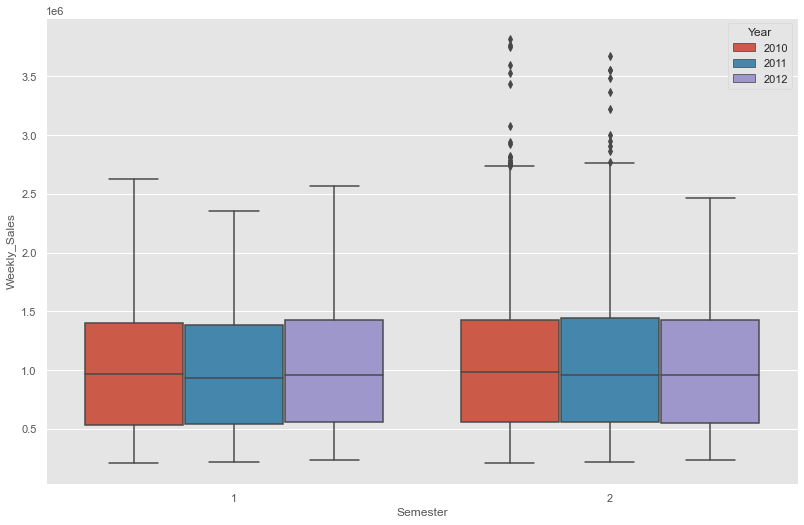

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(data=walmart_, y = 'Weekly_Sales', x= 'Semester', hue='Year')

``We can see an average performance in the sales over the 3 years. Also, some outliers can be observed in semester 2 of years 2010 and 2011. We will handle them before modelling our data``

##### Distribution of sales per month per year

In [36]:
walmart_.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Semester,Week of Year
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,Jan,1,1
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,Jan,1,1
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,Jan,1,1
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,Jan,1,1
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,Jan,1,1


In [37]:
# Insight per month
walmart_.groupby(['Year','Month'])[['Weekly_Sales']].sum()

Weekly_Sales
Year Month              
2010 Apr    1.838118e+08
     Aug    1.845381e+08
     Dec    3.235716e+08
     Feb    1.915869e+08
     Jan    4.223988e+07
     Jul    1.842664e+08
     Jun    1.424361e+08
     Mar    1.862262e+08
     May    2.806119e+08
     Nov    1.587731e+08
     Oct    2.311201e+08
     Sep    1.797041e+08
2011 Apr    2.789693e+08
     Aug    1.880810e+08
     Dec    2.293760e+08
     Feb    1.876092e+08
     Jan    2.119657e+08
     Jul    2.244611e+08
     Jun    1.401936e+08
     Mar    1.365205e+08
     May    1.828017e+08
     Nov    2.534703e+08
     Oct    1.837193e+08
     Sep    2.310323e+08
2012 Apr    1.825428e+08
     Aug    1.916126e+08
     Dec    4.612851e+07
     Feb    1.428296e+08
     Jan    1.722207e+08
     Jul    1.845865e+08
     Jun    2.923883e+08
     Mar    2.307397e+08
     May    1.422830e+08
     Nov    4.692588e+07
     Oct    1.880794e+08
     Sep    1.797959e+08

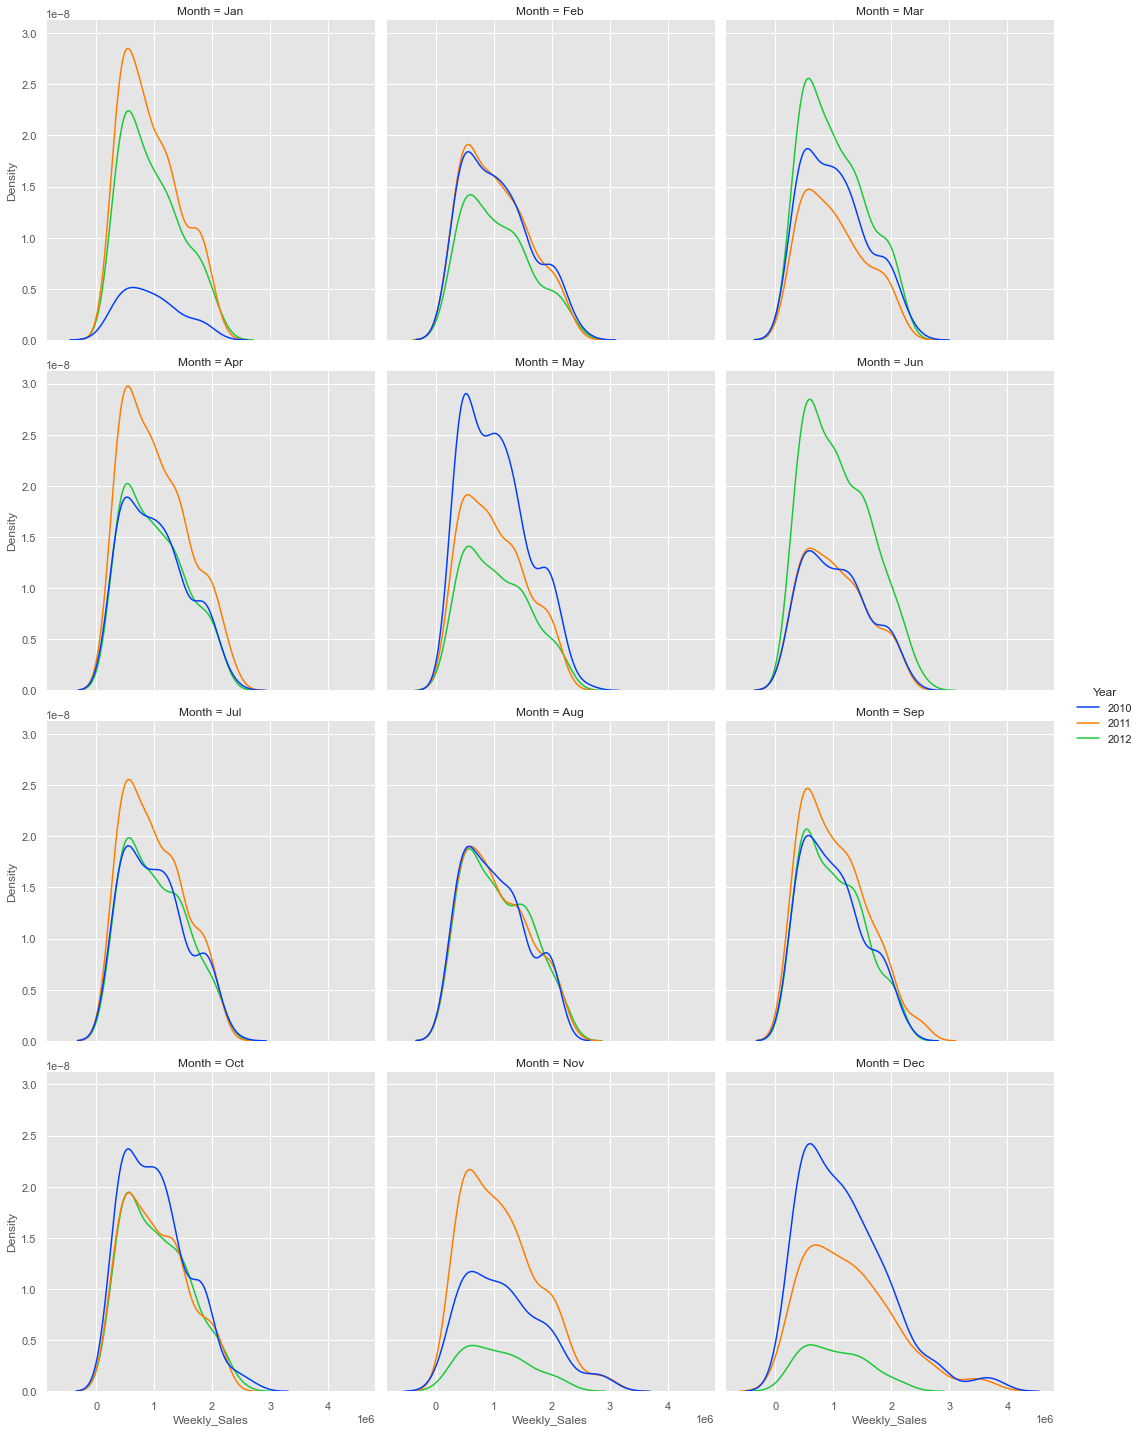

In [38]:
# Insight per month
_ = sns.displot(data= walmart_, x= 'Weekly_Sales', col_wrap= 3, col= 'Month', hue= 'Year', kind='kde', palette='bright')

``A rough drop can be observed in 2012 and particularly during the Months 11 and 12 after a spike in month 9``

### Inferential Analysis

##### Is there a correlation between 'Weekly_Sales', 'Temperature',	'Fuel_Price',	'CPI',	'Unemployment' ?

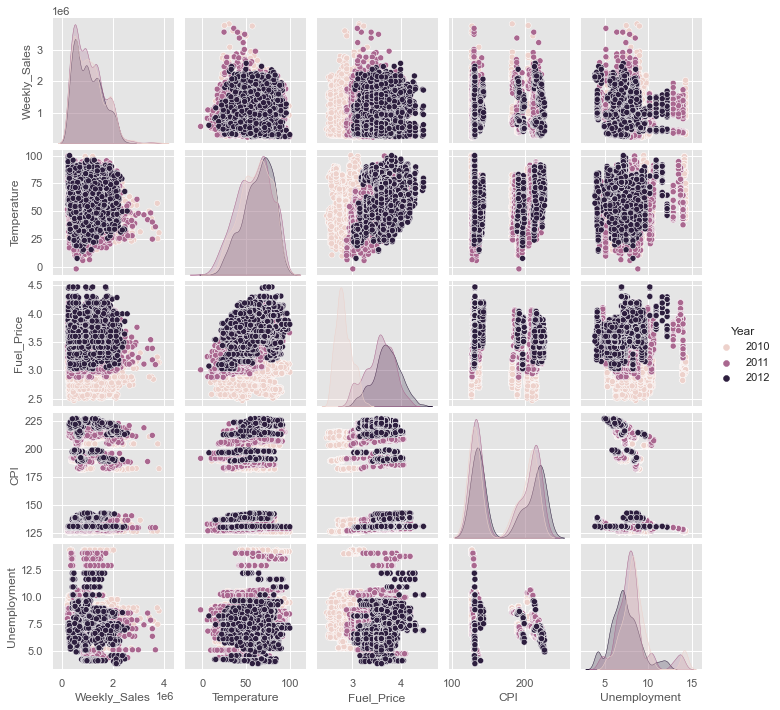

In [39]:
style.use('ggplot')
# Pair plot relevant features 
sns.pairplot(data=walmart, vars=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], hue='Year', size=2)

``There's no apparent linear correlation between the above variables``

<AxesSubplot:>

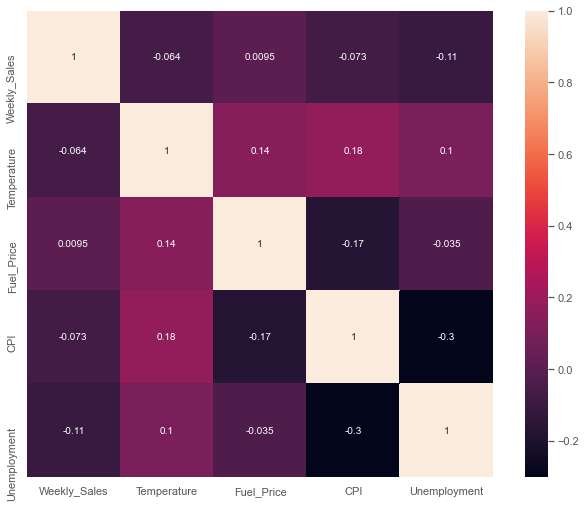

In [40]:
# Plot the heatmap to show the correlation coefficients
plt.figure(figsize=(10,8))

sns.heatmap(walmart[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(), square=True, annot=True)

``No linear correlation between the (continuous) variables``

In [41]:
walmart_.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Semester,Week of Year
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,Jan,1,1
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,Jan,1,1


##### Outliers detection

- In 'Weekly_Sales'

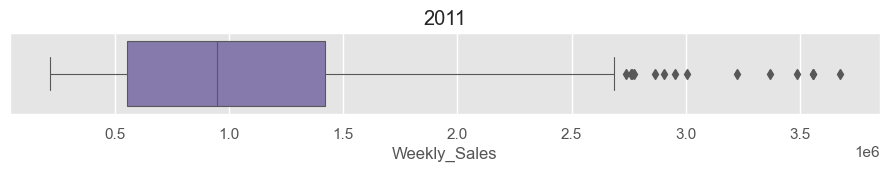

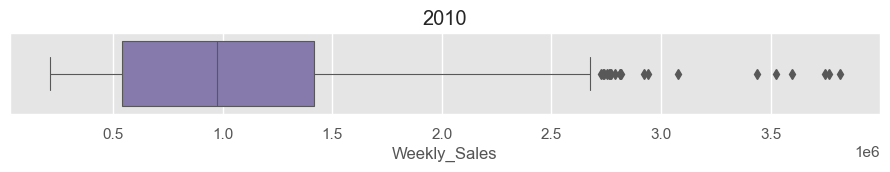

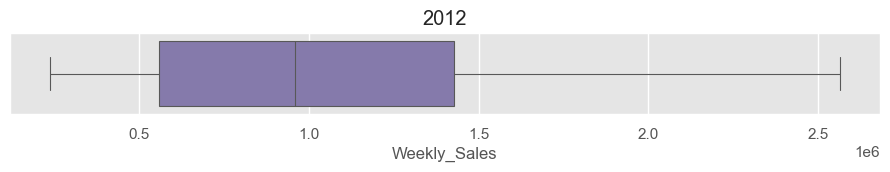

In [42]:
n = len(walmart_['Year'].value_counts().index)
#fig, axs = plt.subplots(n,figsize=(6,18))

for i in range(n):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,1), dpi=100)
    plt.title(walmart_['Year'].value_counts().index[i])
    sns.boxplot (x= walmart_[walmart_['Year']==walmart_['Year'].value_counts().index[i]]['Weekly_Sales'], whis=1.5, linewidth=.8, color='m')

- In 'Fuel_Price'

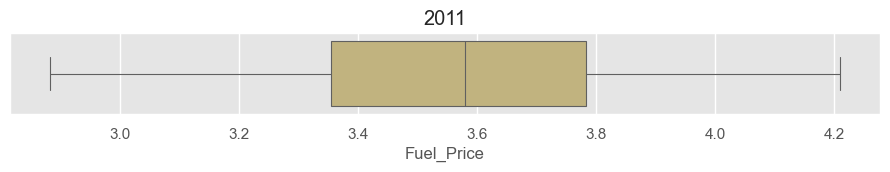

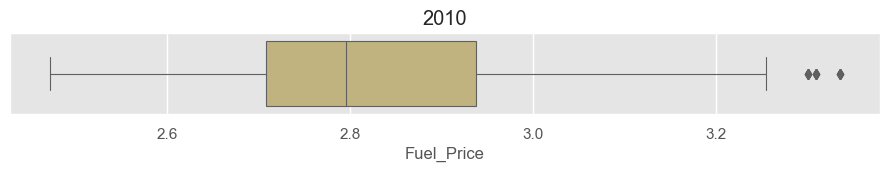

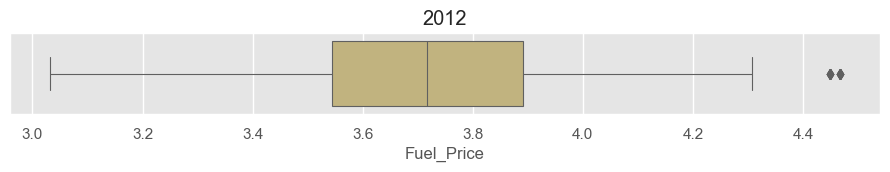

In [43]:
n = len(walmart_['Year'].value_counts().index)
#fig, axs = plt.subplots(n,figsize=(6,18))

for i in range(n):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,1), dpi=100)
    plt.title(walmart_['Year'].value_counts().index[i])
    sns.boxplot (x= walmart_[walmart_['Year']==walmart_['Year'].value_counts().index[i]]['Fuel_Price'], whis=1.5, linewidth=.8, color='y')

- In 'CPI'

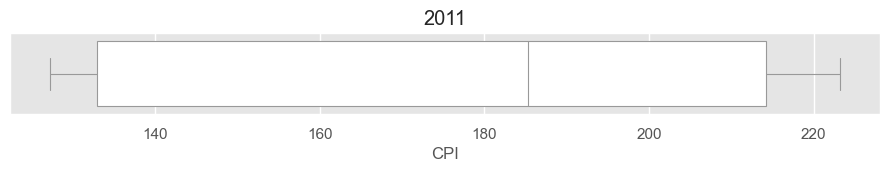

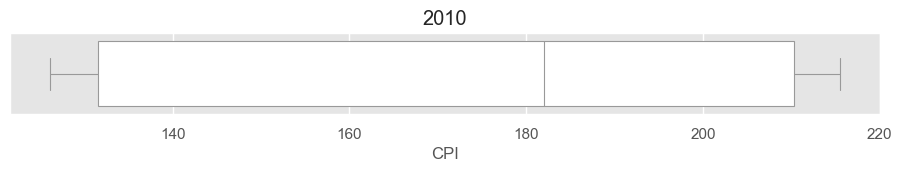

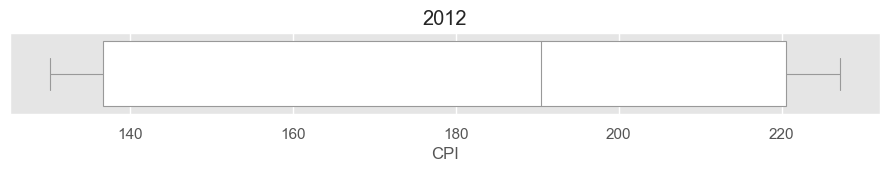

In [44]:
n = len(walmart_['Year'].value_counts().index)
#fig, axs = plt.subplots(n,figsize=(6,18))

for i in range(n):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,1), dpi=100)
    plt.title(walmart_['Year'].value_counts().index[i])
    sns.boxplot (x= walmart_[walmart_['Year']==walmart_['Year'].value_counts().index[i]]['CPI'], whis=1.5, linewidth=.8, color='w')

- In 'Unemployment'

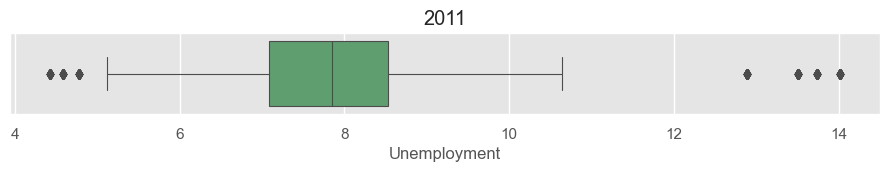

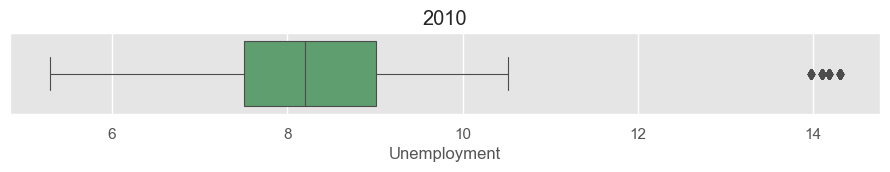

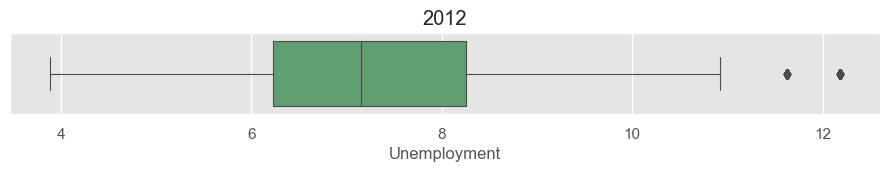

In [45]:
n = len(walmart_['Year'].value_counts().index)
#fig, axs = plt.subplots(n,figsize=(6,18))

for i in range(n):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,1), dpi=100)
    plt.title(walmart_['Year'].value_counts().index[i])
    sns.boxplot (x= walmart_[walmart_['Year']==walmart_['Year'].value_counts().index[i]]['Unemployment'], whis=1.5, linewidth=.8, color='g')

- In 'Temperature'

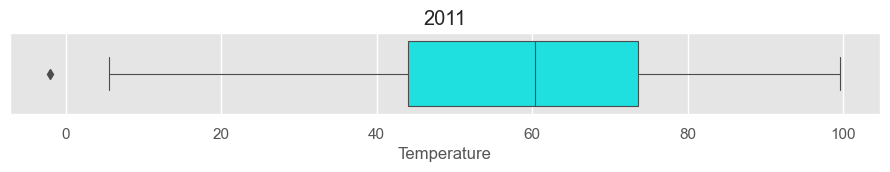

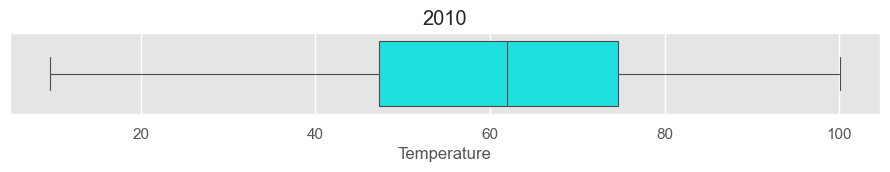

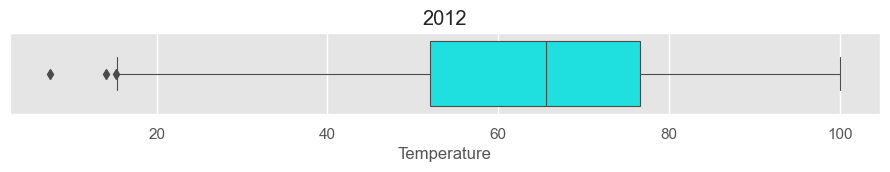

In [46]:
n = len(walmart_['Year'].value_counts().index)
#fig, axs = plt.subplots(n,figsize=(6,18))

for i in range(n):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,1), dpi=100)
    plt.title(walmart_['Year'].value_counts().index[i])
    sns.boxplot (x= walmart_[walmart_['Year']==walmart_['Year'].value_counts().index[i]]['Temperature'], whis=1.5, linewidth=.8, color='cyan')

``Outliers are present in 'Temperature', 'Unemployment', 'Fuel_Price' and 'Weekly_Sales'. No outlier in 'CPI'``

##### Handling the outliers

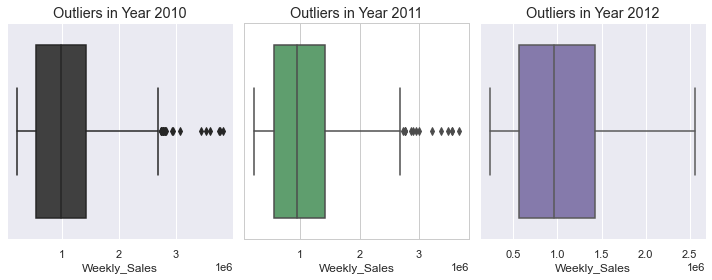

In [47]:
# Slicing the data on each Year (2010, 2011 and 2012)
walmart_2010 = walmart_[(walmart_['Year'] == 2010)]
walmart_2011 = walmart_[(walmart_['Year'] == 2011)]
walmart_2012 = walmart_[(walmart_['Year'] == 2012)]

# View the outliers
f = plt.figure(figsize=(10,4))
gs = f.add_gridspec(1,3)

with sns.axes_style('darkgrid'):
    ax = f.add_subplot(gs[0,0])
    sns.boxplot(x= walmart_2010['Weekly_Sales'], color='.25', whis=1.5).set_title('Outliers in Year 2010')

with sns.axes_style('whitegrid'):
    ax = f.add_subplot(gs[0,1])
    sns.boxplot(x= walmart_2011['Weekly_Sales'], color='g', whis=1.5).set_title('Outliers in Year 2011')

with sns.axes_style('darkgrid'):
    ax = f.add_subplot(gs[0,2])
    sns.boxplot(x= walmart_2012['Weekly_Sales'], color='m', whis=1.5).set_title('Outliers in Year 2012')

f.tight_layout()

In [48]:
# Define function to fix outliers : outliers will be fixed with the IQR method. Values outside of the interval [Q1-Q3] 
# will be considered as outliers

df0 = walmart_2010.copy()
df1 = walmart_2011.copy()
df2 = walmart_2012.copy()

#lower outer fence: Q1 - 3*IQR
#upper outer fence: Q3 + 3*IQR

def fixing_outliers(df,col):
    i=0 
    j=0 
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UOF=Q3+1.5*(IQR)# UOF=upper outer fence
    LOF=Q1-1.5*(IQR)# LOF=lower outer fence
    Clean_col=[] # Create a list to assign value
    Outliers=[]
    for val in df[col]:
        if val<LOF:   
            Clean_col.append(LOF)
            i+=1
        elif val>UOF :  
            Clean_col.append(UOF)
            j+=1
        else : Clean_col.append(val)
    df[col]=Clean_col # update the column by creating a column from the list 
    sns.boxplot(x= df[col], color='cyan', whis=1.5, linewidth=.8, width=.3).set_title('Outliers handled')
    #sns.distplot(df[col])#Plotting univariate distributions
    print('Number of outliers less than lower outer fence: ',i,'\nNumber of outliers greater than upper outer fence: ',j)
    return df[col] .describe()

``Fixing outliers in 'Weekly_Sales' in 2010 and 2011``

- In 'Weekly_Sales': outliers are present in years 2010 and 2011

Number of outliers less than lower outer fence:  0 
Number of outliers greater than upper outer fence:  20


count    2.160000e+03
mean     1.056513e+06
std      5.710590e+05
min      2.099862e+05
25%      5.423213e+05
50%      9.746961e+05
75%      1.415446e+06
max      2.725133e+06
Name: Weekly_Sales, dtype: float64

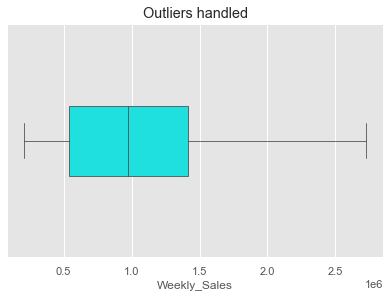

In [49]:
# Fixing 'Weekly_Sales' outliers in 2010
fixing_outliers(df0,'Weekly_Sales')

Number of outliers less than lower outer fence:  0 
Number of outliers greater than upper outer fence:  14


count    2.340000e+03
mean     1.043874e+06
std      5.613391e+05
min      2.153592e+05
25%      5.551077e+05
50%      9.483900e+05
75%      1.421470e+06
max      2.721014e+06
Name: Weekly_Sales, dtype: float64

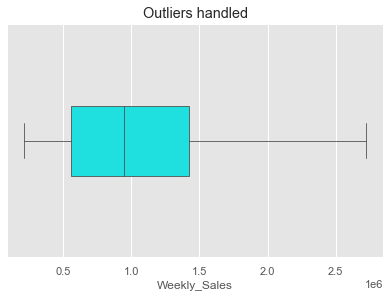

In [50]:
# Fixing 'Weekly_Sales' outliers in 2011
fixing_outliers(df1,'Weekly_Sales')

``Fixing outliers in 'Fuel_Price' in years 2010 and 2012``

- In 'Fuel_Price': outliers are present in years 2010 and 2012

Number of outliers less than lower outer fence:  0 
Number of outliers greater than upper outer fence:  12


count    2160.000000
mean        2.823587
std         0.165597
min         2.472000
25%         2.708000
50%         2.796000
75%         2.938000
max         3.283000
Name: Fuel_Price, dtype: float64

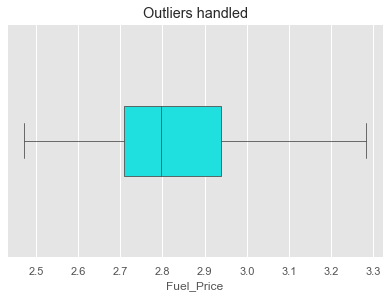

In [51]:
# Fixing 'Fuel_Price' outliers in 2010
fixing_outliers(df0,'Fuel_Price')

Number of outliers less than lower outer fence:  0 
Number of outliers greater than upper outer fence:  12


count    1935.000000
mean        3.709475
std         0.275815
min         3.031000
25%         3.545000
50%         3.717000
75%         3.891000
max         4.410000
Name: Fuel_Price, dtype: float64

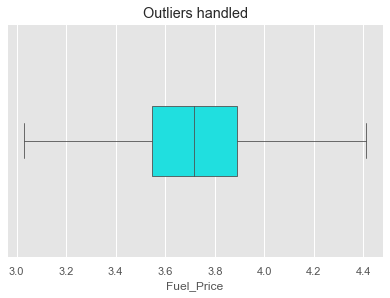

In [52]:
# Fixing 'Fuel_Price' outliers in 2012
fixing_outliers(df2,'Fuel_Price')

``Fixing outliers in 'Unemployment in years 2010, 2011 and 2012'``

- In 'Unemployment': outliers are present in years 2010, 2011 and 2012

Number of outliers less than lower outer fence:  0 
Number of outliers greater than upper outer fence:  144


count    2160.000000
mean        8.300069
std         1.334428
min         5.287000
25%         7.508000
50%         8.200000
75%         9.014000
max        11.273000
Name: Unemployment, dtype: float64

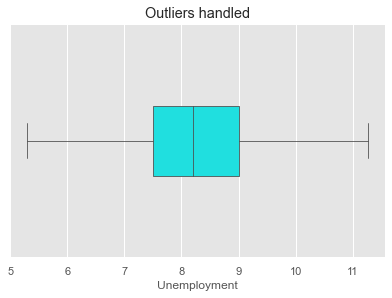

In [53]:
# Fixing 'Unemployment' outliers in 2010
fixing_outliers(df0,'Unemployment')

Number of outliers less than lower outer fence:  80 
Number of outliers greater than upper outer fence:  156


count    2340.000000
mean        7.903638
std         1.372209
min         4.920500
25%         7.082000
50%         7.852000
75%         8.523000
max        10.684500
Name: Unemployment, dtype: float64

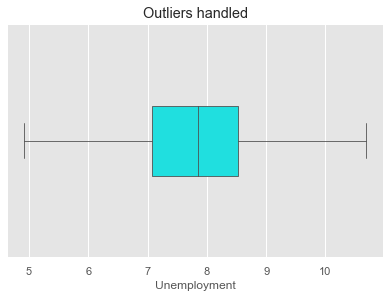

In [54]:
# Fixing 'Unemployment' outliers in 2011
fixing_outliers(df1,'Unemployment')

Number of outliers less than lower outer fence:  0 
Number of outliers greater than upper outer fence:  78


count    1935.000000
mean        7.323113
std         1.634937
min         3.879000
25%         6.228000
50%         7.147000
75%         8.253000
max        11.290500
Name: Unemployment, dtype: float64

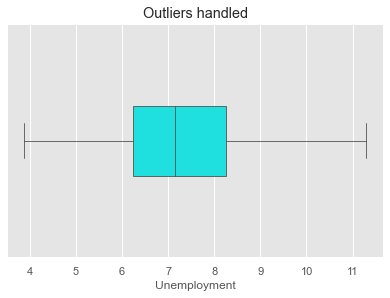

In [55]:
# Fixing 'Unemployment' outliers in 2012
fixing_outliers(df2,'Unemployment')

``Fixing outliers in 'Temperature in years 2010 and 2012'``

- In 'Temperature': outliers are present in years 2010 and 2012

Number of outliers less than lower outer fence:  1 
Number of outliers greater than upper outer fence:  0


count    2340.000000
mean       58.799306
std        19.700309
min        -0.243750
25%        44.040000
50%        60.380000
75%        73.562500
max        99.660000
Name: Temperature, dtype: float64

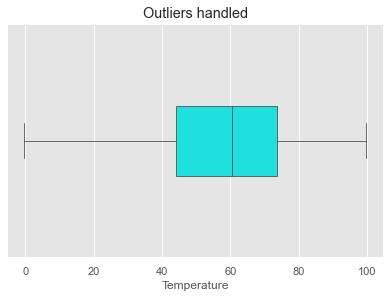

In [56]:
# Fixing 'Temperature' outliers in 2011
fixing_outliers(df1,'Temperature')

Number of outliers less than lower outer fence:  3 
Number of outliers greater than upper outer fence:  0


count    1935.000000
mean       63.367138
std        16.930368
min        15.287500
25%        52.060000
50%        65.540000
75%        76.575000
max       100.070000
Name: Temperature, dtype: float64

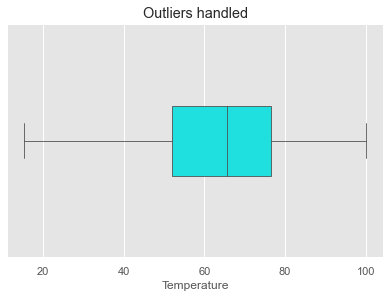

In [57]:
# Fixing 'Temperature' outliers in 2012
fixing_outliers(df2,'Temperature')

``New outliers check-up``

In [58]:
# New dataframe after outliers handling
df = df0.append(df1).append(df2)

In [59]:
# Compare shapes of df and walmart_ dataframes
print(f' Shape of "df" dataframe: {df.shape}')
print(f' Shape of "walmart_" dataframe: {walmart_.shape}')

 Shape of "df" dataframe: (6435, 13)
 Shape of "walmart_" dataframe: (6435, 13)


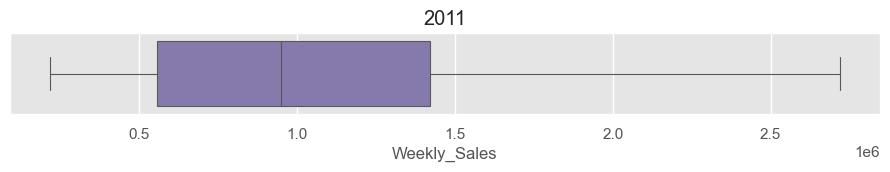

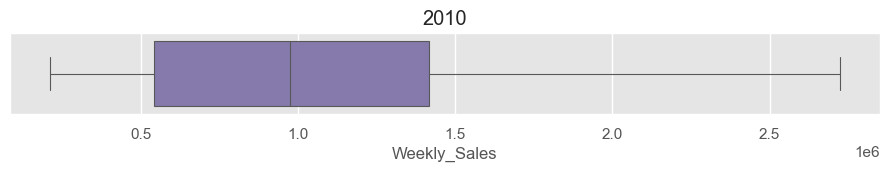

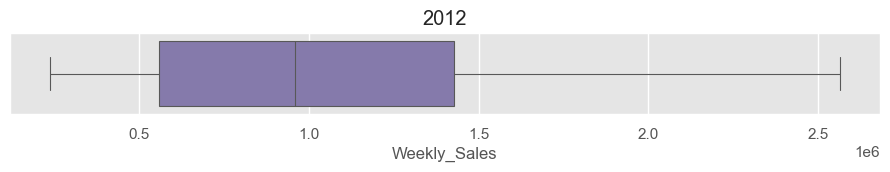

In [60]:
# New check-up of outliers in 'Weekly_Sales'
n = len(df['Year'].value_counts().index)
#fig, axs = plt.subplots(n,figsize=(6,18))

for i in range(n):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,1), dpi=100)
    plt.title(df['Year'].value_counts().index[i])
    sns.boxplot (x= df[df['Year']==walmart_['Year'].value_counts().index[i]]['Weekly_Sales'], whis=1.5, linewidth=.8, color='m')

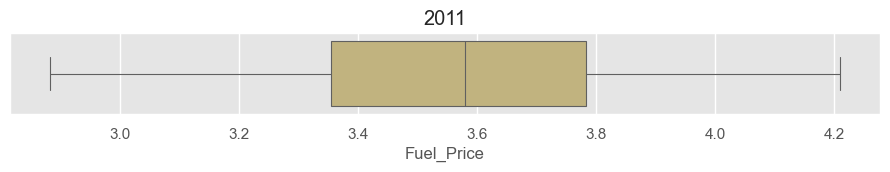

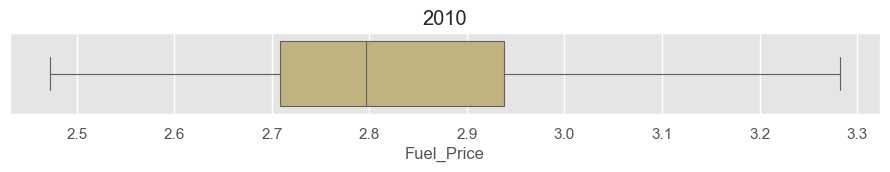

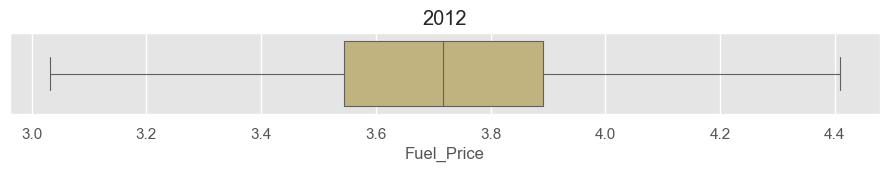

In [61]:
# New check-up of outliers in 'Fuel_Price'
n = len(df['Year'].value_counts().index)
#fig, axs = plt.subplots(n,figsize=(6,18))

for i in range(n):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,1), dpi=100)
    plt.title(df['Year'].value_counts().index[i])
    sns.boxplot (x= df[df['Year']==walmart_['Year'].value_counts().index[i]]['Fuel_Price'], whis=1.5, linewidth=.8, color='y')

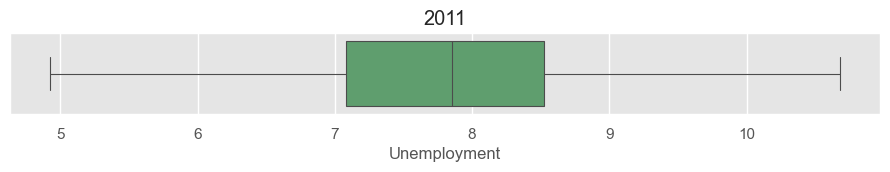

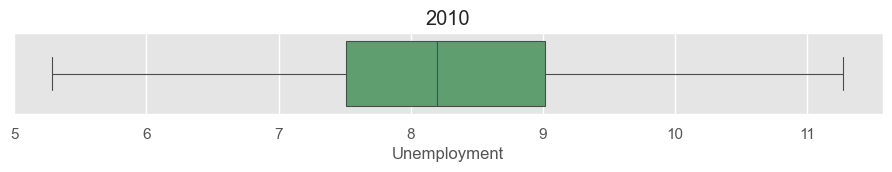

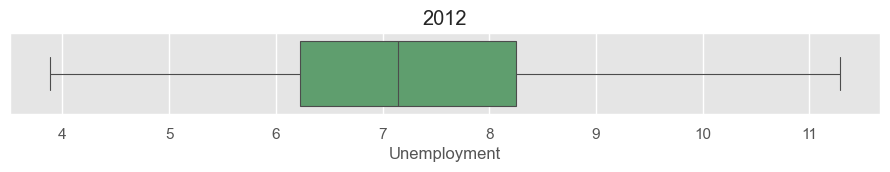

In [62]:
# New check-up of outliers in 'Unemployment'

n = len(df['Year'].value_counts().index)
#fig, axs = plt.subplots(n,figsize=(6,18))

for i in range(n):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,1), dpi=100)
    plt.title(walmart_['Year'].value_counts().index[i])
    sns.boxplot (x= df[df['Year']==walmart_['Year'].value_counts().index[i]]['Unemployment'], whis=1.5, linewidth=.8, color='g')

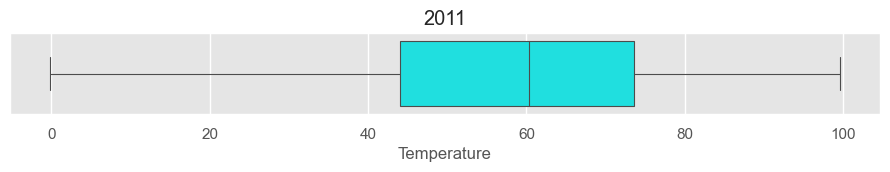

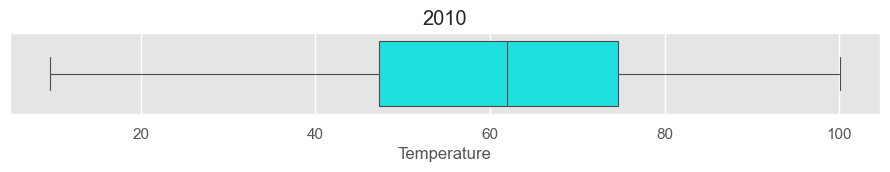

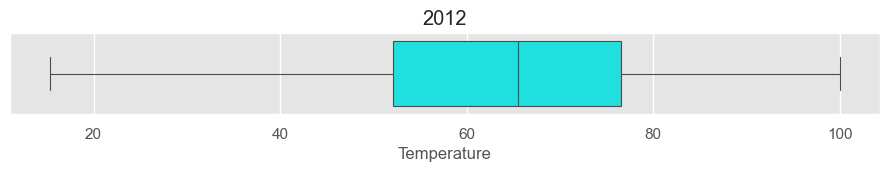

In [63]:
# New check-up of outliers in 'Temperature'
n = len(df['Year'].value_counts().index)
#fig, axs = plt.subplots(n,figsize=(6,18))

for i in range(n):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,1), dpi=100)
    plt.title(df['Year'].value_counts().index[i])
    sns.boxplot (x= df[df['Year']==walmart_['Year'].value_counts().index[i]]['Temperature'], whis=1.5, linewidth=.8, color='cyan')

In [64]:
# Copy the new dataframe
walmart_no_outliers = df.copy()

## Statistical Model

`` For Store 1 – Build  prediction models to forecast demand``

**Linear Regression** – ``Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.``

- Change dates into days by creating new variable.

- Select the model which gives best accuracy.

In [65]:
# Slice the dataframe on Store 1
df_store1 = walmart_no_outliers[walmart_no_outliers['Store']=='1']
df_store1 = df_store1.drop('Store', axis=1) # Drop 'Store1' column

# Sort the dataframe by 'Date'
store1 = df_store1.sort_values('Date')

# Reindex the dataframe
store1.reset_index(level=0, inplace=True, drop=True)

# View 5 first rows
store1.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Semester,Week of Year
0,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,2010,1,Jan,1,1
1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,1,Feb,1,5
2,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,2010,1,Feb,1,5
3,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,Feb,1,7
4,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,Feb,1,8


In [66]:
# Shape of new dataframe
store1.shape

(143, 12)

In [67]:
# Create a new variable 'Day' starting from 1

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
labencoder = LabelEncoder()
store1['Day'] = labencoder.fit_transform(store1['Date'])
store1['Day'] += 1

# View the tail of dataframe
store1.tail()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Semester,Week of Year,Day
138,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,2012,4,Oct,2,41,139
139,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,4,Oct,2,42,140
140,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,2012,4,Oct,2,43,141
141,2012-11-05,1611096.05,0,73.77,3.688,221.725663,7.143,2012,4,Nov,2,45,142
142,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,2012,4,Dec,2,50,143


In [68]:
# General info of the 'store1'
store1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
 2   Holiday_Flag  143 non-null    int64         
 3   Temperature   143 non-null    float64       
 4   Fuel_Price    143 non-null    float64       
 5   CPI           143 non-null    float64       
 6   Unemployment  143 non-null    float64       
 7   Year          143 non-null    int64         
 8   Quarter       143 non-null    int64         
 9   Month         143 non-null    object        
 10  Semester      143 non-null    int64         
 11  Week of Year  143 non-null    UInt32        
 12  Day           143 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(5), object(1)
memory usage: 14.2+ KB


In [69]:
# Convert 'Holiday_Flag', 'Quarter', 'Month', 'Week of Year' to integer
store1['Holiday_Flag'] = store1['Holiday_Flag'].apply(lambda x : int(x))
store1['Quarter'] = store1['Quarter'].apply(lambda x : int(x))
store1['Week of Year'] = store1['Week of Year'].apply(lambda x : int(x))

<AxesSubplot:>

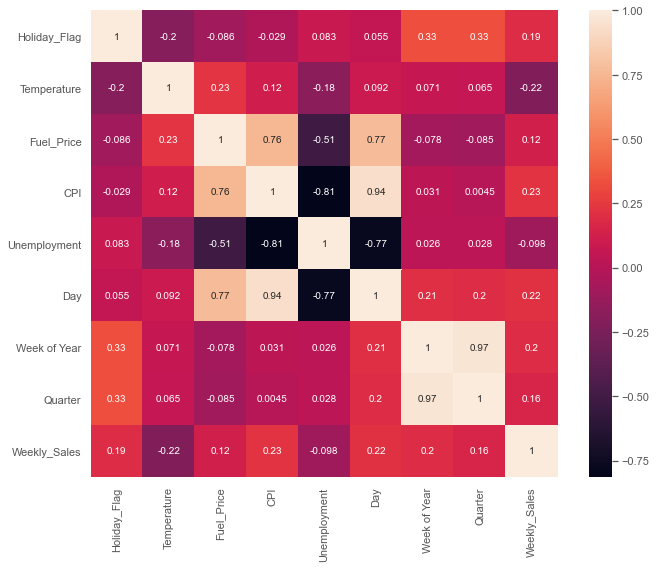

In [70]:
# Let's observe correlations between the variables
plt.figure(figsize=(10,8))
sns.heatmap(store1[['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Day', 'Week of Year','Month','Quarter','Weekly_Sales']].corr(), square=True, annot=True)


Some correlations exist between the target variable ('Weekly_Sales') and 'Week of Year', 'Quarter', 'Day', 'Unemployment', 'CPI', 'Fuel_Price', 'Temperature' and 'Holiday_Flag'.
However some high correlations are observed between the variables 'CPI', 'Fuel_Price', 'Unemployment', 'Day' : We shall verify the Variance Inflation Factor later on **if necessary**.

Hypothesis testing : 

``H0 : All coefficients (for features : 'CPI','Unemployment','Holiday_Flag','Temperature','Fuel_Price', 'Day') are equal to zero``

``Ha : Not all coefficients (for features : 'CPI','Unemployment','Holiday_Flag','Temperature','Fuel_Price', 'Day') are equal to zero simultaneously``

In [71]:
# Import 'pearsonr' library
from scipy.stats import pearsonr

# Correlation between 'Weekly_Sales' and 'CPI'
features = ['CPI','Unemployment','Holiday_Flag','Temperature','Fuel_Price', 'Day', 'Week of Year','Quarter']

for var in features:
    corr, pvalue = pearsonr(store1[var],store1['Weekly_Sales'])
    print(f'Correlation Coef for {var} and Weekly_Sales: {corr:.3f}.')
    print(f'pvalue for for {var} and Weekly_Sales: {pvalue:.3f}.')
    if pvalue < .05:
        print(f'We reject H0 for {var} and "Weekly_Sales". {var} can be accepted in the model at this stage. \n')
    else:
        print(f'We fail to reject H0 for {var} and "Weekly_Sales". {var} cannot be accepted in the model. \n')

Correlation Coef for CPI and Weekly_Sales: 0.225.
pvalue for for CPI and Weekly_Sales: 0.007.
We reject H0 for CPI and "Weekly_Sales". CPI can be accepted in the model at this stage. 

Correlation Coef for Unemployment and Weekly_Sales: -0.098.
pvalue for for Unemployment and Weekly_Sales: 0.244.
We fail to reject H0 for Unemployment and "Weekly_Sales". Unemployment cannot be accepted in the model. 

Correlation Coef for Holiday_Flag and Weekly_Sales: 0.195.
pvalue for for Holiday_Flag and Weekly_Sales: 0.020.
We reject H0 for Holiday_Flag and "Weekly_Sales". Holiday_Flag can be accepted in the model at this stage. 

Correlation Coef for Temperature and Weekly_Sales: -0.223.
pvalue for for Temperature and Weekly_Sales: 0.008.
We reject H0 for Temperature and "Weekly_Sales". Temperature can be accepted in the model at this stage. 

Correlation Coef for Fuel_Price and Weekly_Sales: 0.125.
pvalue for for Fuel_Price and Weekly_Sales: 0.138.
We fail to reject H0 for Fuel_Price and "Weekly_S

``Since some features have been rejected we can calculate the Variance Inflation Factor for colinearity between 'CPI' and 'Day' ``

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#linreg = LinearRegression(fit_intercept=True)
#linreg.fit(y_train, X_train)

def calc_vif(x_df):
    vif_dict = {}
    cols = list(x_df.columns)
    for col in cols:
        features_df = x_df.drop(columns = col)
        label_df = x_df[col]
        vif_reg = LinearRegression(fit_intercept=True)
        vif_reg.fit(features_df, label_df)
        vif_pred = vif_reg.predict(features_df)
        vif_r2 = r2_score(label_df, vif_pred)
        vif = 1 / (1 - vif_r2)
        print(col, vif)

calc_vif(store1[['Weekly_Sales','CPI','Day']])

Weekly_Sales 1.0537759516587377
CPI 9.106599289248091
Day 9.073450728038566


``The variables 'CPI', and 'Day' have a VIF > 5. We will then keep the 'CPI' only in the model '``

##### Linear Regression - 

In [74]:
# Define the features
X = store1[['CPI','Holiday_Flag','Temperature']]
# Define the label
y = store1['Weekly_Sales']

In [75]:
# Import the train_test library
from sklearn.model_selection import train_test_split

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)

In [76]:
# Import LinearRegression library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Initiate the function
linreg = LinearRegression()

# Fit the data
linreg.fit(X_train, y_train)

# Train Score 
print(f'\t R2_train : {linreg.score(X_train, y_train):.3f}')

# Test Score 
print(f'\t R2_test : {linreg.score(X_test, y_test):.3f} \n')

# Predictions
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

print(f'\t Mean absolute error_train : {mean_absolute_error(y_train, y_train_pred):.3f}')
print(f'\t Mean absolute error_test : {mean_absolute_error(y_test, y_test_pred):.3f}\n')

# Mean squared error
print(f'\t Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=True):.3f}')
print(f'\t Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=True):.3f}\n')

# Root Mean squared error
print(f'\t Root Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=False):.3f}')
print(f'\t Root Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=False):.3f}')


	 R2_train : 0.143
	 R2_test : 0.107 

	 Mean absolute error_train : 96654.304
	 Mean absolute error_test : 100035.539

	 Mean squared error_train : 19737747327.471
	 Mean squared error_test : 24453169792.408

	 Root Mean squared error_train : 140491.093
	 Root Mean squared error_test : 156375.093


##### Ridge Model - 

In [77]:
# Define the features
X = store1[['CPI','Holiday_Flag','Temperature','Fuel_Price']]
# Define the label
y = store1['Weekly_Sales']

# Resplit the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)

# Import Ridge library
from sklearn.linear_model import Ridge

# Initiate the function
ridge = Ridge(alpha=.8, fit_intercept=False)

# Fit the data
ridge.fit(X_train, y_train)

# Train Score 
print(f'\t R2_train : {ridge.score(X_train, y_train):.3f}')

# Test Score 
print(f'\t R2_test : {ridge.score(X_test, y_test):.3f} \n')

# Predictions
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print(f'\t Mean absolute error_train : {mean_absolute_error(y_train, y_train_pred):.3f}')
print(f'\t Mean absolute error_test : {mean_absolute_error(y_test, y_test_pred):.3f}\n')

# Mean squared error
print(f'\t Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=True):.3f}')
print(f'\t Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=True):.3f}\n')

# Root Mean squared error
print(f'\t Root Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=False):.3f}')
print(f'\t Root Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=False):.3f}')



	 R2_train : 0.145
	 R2_test : 0.100 

	 Mean absolute error_train : 95778.783
	 Mean absolute error_test : 99620.197

	 Mean squared error_train : 19684220529.789
	 Mean squared error_test : 24630893722.760

	 Root Mean squared error_train : 140300.465
	 Root Mean squared error_test : 156942.326


**Bayesian Ridge model -**

In [79]:
# Import linear_model
from sklearn import linear_model

# Define the features
X = store1[['CPI','Holiday_Flag','Temperature','Fuel_Price']]
# Define the label
y = store1['Weekly_Sales']

# Resplit the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)

# Initiate the function
bayesianlinReg = linear_model.BayesianRidge()

# Fit the BayesianRidge model to the data
bayesianlinReg.fit(X_train,y_train)

# Train Score 
print(f'\t R2_train : {bayesianlinReg.score(X_train, y_train):.3f}')

# Test Score 
print(f'\t R2_test : {bayesianlinReg.score(X_test, y_test):.3f} \n')

# Predictions
y_test_pred = bayesianlinReg.predict(X_test)
y_train_pred = bayesianlinReg.predict(X_train)

print(f'\t Mean absolute error_train : {mean_absolute_error(y_train, y_train_pred):.3f}')
print(f'\t Mean absolute error_test : {mean_absolute_error(y_test, y_test_pred):.3f}\n')

# Mean squared error
print(f'\t Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=True):.3f}')
print(f'\t Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=True):.3f}\n')

# Root Mean squared error
print(f'\t Root Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=False):.3f}')
print(f'\t Root Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=False):.3f}')



	 R2_train : 0.099
	 R2_test : 0.097 

	 Mean absolute error_train : 97625.963
	 Mean absolute error_test : 104232.053

	 Mean squared error_train : 20749388115.508
	 Mean squared error_test : 24708457259.465

	 Root Mean squared error_train : 144046.479
	 Root Mean squared error_test : 157189.240


##### Support Vector Regression - 

In [80]:
# Define the features
X = store1[['CPI','Holiday_Flag','Temperature','Fuel_Price']]
# Define the label
y = store1['Weekly_Sales']

# Resplit the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)

# Import svm
from sklearn.svm import SVR

# Initiate the function
svr = SVR('linear',C=1.0, degree=4)

# Fit the data
svr.fit(np.array(X_train), np.array(y_train))

# Train Score 
print(f'\t R2_train : {svr.score(X_train, y_train):.3f}')

# Test Score 
print(f'\t R2_test : {svr.score(X_test, y_test):.3f} \n')

# Predictions
y_test_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)

print(f'\t Mean absolute error_train : {mean_absolute_error(y_train, y_train_pred):.3f}')
print(f'\t Mean absolute error_test : {mean_absolute_error(y_test, y_test_pred):.3f}\n')

# Mean squared error
print(f'\t Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=True):.3f}')
print(f'\t Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=True):.3f}\n')

# Root Mean squared error
print(f'\t Root Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=False):.3f}')
print(f'\t Root Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=False):.3f}')



	 R2_train : 0.004
	 R2_test : -0.026 

	 Mean absolute error_train : 101981.733
	 Mean absolute error_test : 104873.993

	 Mean squared error_train : 22935067644.169
	 Mean squared error_test : 28085952964.015

	 Root Mean squared error_train : 151443.282
	 Root Mean squared error_test : 167588.642


``The negative R-Squarred indicates that the SVR model cannot fit the data``

##### Decision Tree model -

In [81]:
# Define the features
X = store1[['CPI','Holiday_Flag','Temperature','Fuel_Price']]
# Define the label
y = store1['Weekly_Sales']

# Resplit the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)

# Import tree
from sklearn.tree import DecisionTreeRegressor

# Initiate the function
tree_reg = DecisionTreeRegressor(criterion='mse',splitter='best',max_features='auto', max_leaf_nodes=2)

# Fit the data
tree_reg.fit(X_train, y_train)

# Train Score 
print(f'\t R2_train : {tree_reg.score(X_train, y_train):.3f}')

# Test Score 
print(f'\t R2_test : {tree_reg.score(X_test, y_test):.3f} \n')

# Predictions
y_test_pred = tree_reg.predict(X_test)
y_train_pred = tree_reg.predict(X_train)

print(f'\t Mean absolute error_train : {mean_absolute_error(y_train, y_train_pred):.3f}')
print(f'\t Mean absolute error_test : {mean_absolute_error(y_test, y_test_pred):.3f}\n')

# Mean squared error
print(f'\t Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=True):.3f}')
print(f'\t Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=True):.3f}\n')

# Root Mean squared error
print(f'\t Root Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=False):.3f}')
print(f'\t Root Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=False):.3f}')



	 R2_train : 0.079
	 R2_test : 0.028 

	 Mean absolute error_train : 99243.699
	 Mean absolute error_test : 111191.058

	 Mean squared error_train : 21197933902.927
	 Mean squared error_test : 26616628288.982

	 Root Mean squared error_train : 145595.103
	 Root Mean squared error_test : 163146.034


##### Random Forest Regressor - 

In [82]:
# Define the features
X = store1[['CPI','Holiday_Flag','Temperature','Fuel_Price']]
# Define the label
y = store1['Weekly_Sales']

# Resplit the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)

# Import Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Initiate the function
rf = RandomForestRegressor(criterion='mse',max_depth=2, random_state=0)

# Fit the data
rf.fit(X_train, y_train)

# Train Score 
print(f'\t R2_train : {rf.score(X_train, y_train):.3f}')

# Test Score 
print(f'\t R2_test : {rf.score(X_test, y_test):.3f} \n')

# Predictions
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

print(f'\t Mean absolute error_train : {mean_absolute_error(y_train, y_train_pred):.3f}')
print(f'\t Mean absolute error_test : {mean_absolute_error(y_test, y_test_pred):.3f}\n')

# Mean squared error
print(f'\t Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=True):.3f}')
print(f'\t Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=True):.3f}\n')

# Root Mean squared error
print(f'\t Root Mean squared error_train : {mean_squared_error(y_train, y_train_pred, squared=False):.3f}')
print(f'\t Root Mean squared error_test : {mean_squared_error(y_test, y_test_pred, squared=False):.3f}')



	 R2_train : 0.307
	 R2_test : 0.109 

	 Mean absolute error_train : 89234.814
	 Mean absolute error_test : 102052.579

	 Mean squared error_train : 15954196461.048
	 Mean squared error_test : 24382818640.648

	 Root Mean squared error_train : 126309.922
	 Root Mean squared error_test : 156149.988


**CONCLUSION**


|        **Model**      	  | **R-Squared Train** | **R-Squared Test** | **Conclusion** |
|:-------------------------:  |:-------------------:|:------------------:|:--------------:|
|  	Random Forest Regressor   |        0.307 	    |       0.109        |    ``1st``     |
|   Linear Regression         |        0.143   	    |       0.107        |    ``2nd``     |
|   Ridge   	              |        0.145  	    |       0.100        |    ``3rd``     |
|  	Decision Tree             |        0.079 	    |       0.028        |    ``4th``     |
|   Bayesian Ridge            |        0.099 	    |       0.097        |    ``5th``     |
